# Data Cleaning and Analysis for Surveys
## Star Wars Survey 
While waiting for *"Star Wars: The Force Awakens"* to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that *“The Empire Strikes Back”* is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 1,186 total responses, which can be downloaded from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## Project goals
The first goal of this project is to showcase the data cleaning steps often required for surveys. The Star Wars survey contains not just single-choice answers, but also multiple-choice answers and rating scales. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

The second goal of the project is to analyse the data to answer the questions below:

1. How many people watched at least one of the Star Wars movies? 
2. What is the best Star Wars movie?
3. What is the most viewed Star Wars movie?
4. Which character do respondents like the most?
5. Which character do respondents dislike the most?
6. Which character is the most controversial (split between likes and dislikes)?
7. Are the answers to some of the previous questions the same if the data is segmented? 
    For example: 
    * is there any difference for Male and Female responses?
    * is there any difference based on Education?
    * etc.

## Getting to know the data

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 40

star_wars = pd.read_csv("data/star_wars.csv", encoding="ISO-8859-1")
star_wars_before = star_wars.copy()
star_wars.head(4)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [2]:
star_wars.shape

(1187, 38)

The data has several columns, including the demographic characteristics:

* `RespondentID` — An anonymized ID for the respondent (person taking the survey)
* `Gender` — the respondent's gender
* `Age` — the respondent's age
* `Household Income` — the respondent's income
* `Education` — the respondent's education level
* `Location (Census Region)` — the respondent's location

The survey has the following "Yes or No response" questions:
* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`
* `Are you familiar with the Expanded Universe?`
* `Do you consider yourself to be a fan of the Expanded Universe?`
* `Do you consider yourself to be a fan of the Star Trek franchise?`

There are several other columns containing answers to questions about the Star Wars movies:
* `Which of the following Star Wars films have you seen?` 
* `Please rank the Star Wars films in order of preference with 1 being your favorite film and 6 being your least favorite film`
* `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.`
* `Which character shot first?`	

For some of these questions, the respondent had to check one or more boxes. As mentioned earlier, this type of data is difficult to represent in a column. Therefore there will be a lot of cleaning for these columns. 

## Goal 1 - Data Cleaning
### Removing unnecessary data 
First we will remove the information row from the data, saving it to the seperate dataframe with just one row. 

In [3]:
info = star_wars.drop(star_wars.index.to_list()[1:])
# Remove information row
star_wars.drop(0, inplace=True)

### Cleaning column names 
In general, column names should make sense and ideally be concise. For now we will change the names for just "Yes or No response" columns.

In [4]:
columns_name_change = {'Have you seen any of the 6 films in the Star Wars franchise?':'Seen any films in the Star Wars franchise?',
                                      'Do you consider yourself to be a fan of the Star Wars film franchise?':'Fan of the Star Wars franchise?',
                                      'Are you familiar with the Expanded Universe?':'Familiar with the Expanded Universe?',
                                      'Do you consider yourself to be a fan of the Expanded Universe?æ':'Fan of the Expanded Universe?',
                                      'Do you consider yourself to be a fan of the Star Trek franchise?':'Fan of the Star Trek franchise?'
                      }

star_wars = star_wars.rename(columns=columns_name_change)

# Printing columns to check and to copy-paste their names to code
star_wars.columns

Index(['RespondentID', 'Seen any films in the Star Wars franchise?',
       'Fan of the Star Wars franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Familiar with the Expanded Universe?', 'Fan of the Expanded Universe?',
       'Fan of the Sta

### Typical steps for any data cleaning

Next let's check what were the possible answers for the survey. In the meanwhile we will also check if the collected data is of a good quality. This way we will be able to understand what cleaning steps maybe required.

In [5]:
demographics = ['Gender', 'Age', 'Household Income', 'Education', 'Location (Census Region)']

for col in demographics: 
    print(f"Possible replies for column:\n{star_wars[col].value_counts(dropna=False)}\n")

Possible replies for column:
Gender
Female    549
Male      497
NaN       140
Name: count, dtype: int64

Possible replies for column:
Age
45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: count, dtype: int64

Possible replies for column:
Household Income
NaN                    328
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: count, dtype: int64

Possible replies for column:
Education
Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: count, dtype: int64

Possible replies for column:
Location (Census Region)
East North Central    181
Pacific               175
South Atlantic        170
NaN                   143
Middle Atlantic       122
West South Central    110
West North Central 

In [6]:
yes_no_questions = ['Seen any films in the Star Wars franchise?', 
                    'Fan of the Star Wars franchise?',
                    'Familiar with the Expanded Universe?', 
                    'Fan of the Expanded Universe?',  
                    'Fan of the Star Trek franchise?']

for col in yes_no_questions: 
    print(f"Possible replies for column:\n{star_wars[col].value_counts(dropna=False)}\n")

Possible replies for column:
Seen any films in the Star Wars franchise?
Yes    936
No     250
Name: count, dtype: int64

Possible replies for column:
Fan of the Star Wars franchise?
Yes    552
NaN    350
No     284
Name: count, dtype: int64

Possible replies for column:
Familiar with the Expanded Universe?
No     615
NaN    358
Yes    213
Name: count, dtype: int64

Possible replies for column:
Fan of the Expanded Universe?
NaN    973
No     114
Yes     99
Name: count, dtype: int64

Possible replies for column:
Fan of the Star Trek franchise?
No     641
Yes    427
NaN    118
Name: count, dtype: int64



Now we may conclude that we work with survey data collected through well-designed online form. There are no gibberish, unrelated or nonsense answers. Input types seemed to be strictly enforced. Therefore we don't need to do format validation or identify and remove outliers.

However we will check for duplicates just in case.

In [7]:
duplicate_values = star_wars[star_wars.duplicated()]
duplicate_values

,RespondentID,Seen any films in the Star Wars franchise?,Fan of the Star Wars franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Familiar with the Expanded Universe?,Fan of the Expanded Universe?,Fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)


There are no duplicates in the dataset

### Cleaning and Mapping Yes/No Columns
We can make the data a bit easier to analyze by converting each column that contains `Yes`, `No` and `NaN` values to a Boolean with the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [8]:
yes_no = {
    "Yes": True,
    "No": False
}

for column_name in yes_no_questions:
    star_wars[column_name] = star_wars[column_name].map(yes_no)
    
# Checking if it worked as expected    
print(star_wars[yes_no_questions[1]].value_counts(dropna=False))

Fan of the Star Wars franchise?
True     552
NaN      350
False    284
Name: count, dtype: int64


### Cleaning and Mapping Checkbox Columns

In the survey there was a questions with different checkbox answers, that are now located in seperate columns:
* `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* `Unnamed: 4` — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* `Unnamed: 5` — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* `Unnamed: 6` — whether or not the respondent saw Star Wars: Episode IV A New Hope.
* `Unnamed: 7` — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* `Unnamed: 8` — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column to something more intuitive.  

In [9]:
star_wars.iloc[:,3:9] = ~star_wars.iloc[:,3:9].isnull()

count = 1
for column_name in list(star_wars.columns[3:9]):
    star_wars = star_wars.rename(columns={column_name : "seen_"+str(count)})
    count += 1

In [10]:
# Checking the result
star_wars.iloc[:,3:9].head(3)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False


### Cleaning the Ranking Columns
The second group of question and answers contains rank information - 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked Star Wars: Episode I The Phantom Menace
* `Unnamed: 10` — How much the respondent liked Star Wars: Episode II Attack of the Clones
* `Unnamed: 11` — How much the respondent liked Star Wars: Episode III Revenge of the Sith
* `Unnamed: 12` — How much the respondent liked Star Wars: Episode IV A New Hope
* `Unnamed: 13` — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* `Unnamed: 14` — How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [11]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

count = 1
for column_name in list(star_wars.columns[9:15]):
    star_wars = star_wars.rename(columns={column_name : "ranking_"+str(count)})
    count += 1

In [12]:
# Checking the result
star_wars.iloc[:,9:15].head(3)

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


### Cleaning the Likert scale columns
The third group of question and answers (columns 15-28) contain data on the characters respondents view favorably and unfavorably - `Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her`. The 5 point Likert scale is used together with the Unfamiliar option as reply options. We will convert categorical data to quantitative in the following way:
* Very favorably = 5
* Somewhat favorably = 4
* Neither favorably nor unfavorably (neutral) = 3
* Somewhat unfavorably = 2
* Very unfavorably = 1
* Unfamiliar (N/A) = NaN

But first let's change the column names from generic to character name.

In [13]:
for name_old, name_new in zip(list(star_wars.columns[15:29]), list(info.iloc[0,15:29].values)):
    star_wars = star_wars.rename(columns={name_old : name_new})

In [14]:
likert_scale = {"Very favorably": 5,
                "Somewhat favorably" : 4,
                "Neither favorably nor unfavorably (neutral)" : 3,
                "Somewhat unfavorably" : 2,
                "Very unfavorably" : 1,
                "Unfamiliar (N/A)" : np.NaN}

for column_name in list(star_wars.columns[15:29]):
    star_wars[column_name] = star_wars[column_name].map(likert_scale)

In [15]:
# Checking the result
star_wars.iloc[:,15:29].head(3)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The results of Data Cleaning
Dataset before cleaning:

In [16]:
star_wars_before.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Dataset after cleaning:

In [17]:
star_wars.head()

,RespondentID,Seen any films in the Star Wars franchise?,Fan of the Star Wars franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Familiar with the Expanded Universe?,Fan of the Expanded Universe?,Fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Goal 2 - Data Analysis


### How many people watched at least one of the Star Wars movies? 

In [18]:
question = 'Seen any films in the Star Wars franchise?'

count = pd.DataFrame({'absolute': star_wars[[question]].value_counts(),
                      'relative_%': round(star_wars[[question]].value_counts(normalize=True)*100,0)
                     })
                       
count                        

,absolute,relative_%
Seen any films in the Star Wars franchise?,,
True,936,79.0
False,250,21.0


80% of the respondents have seen at least one movie from the Star Wars franchise. Let's see how the answer varies for different segments of our dataset. For the segments we will use the previoulsy defined demographics columns:  

In [19]:
demographics

['Gender', 'Age', 'Household Income', 'Education', 'Location (Census Region)']

In [23]:
# Function to create Seaborn's countplot with the counts of observations in each categorical bin either 
# from 'x' or 'y' and segmented with 'hue' 
def segments(data, ax, x=None, y=None, hue=None, order=None, hue_order=None, 
             palette='Set1', title=None, ticks_rotation=0, y_note=-0.05):
    # Create countplot
    sns.countplot(data=data, x=x, y=y, hue=hue, order=order, hue_order=hue_order, ax=ax, palette=palette)
 
    # Remove labels 
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Remove ticks and labels from correct axis, calculate totals and change limits
    if x is None:
        tick_labels = [tick.get_text() for tick in ax.get_yticklabels()]
        ax.set_xticks([])
        plt.yticks(rotation=ticks_rotation)
        x_min, x_max = ax.get_xlim()
        ax.set_xlim(x_min, x_max * 1.08)
        group_totals = data.groupby([y, hue]).size()
    if y is None:
        tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
        ax.set_yticks([])
        plt.xticks(rotation=ticks_rotation)
        y_min, y_max = ax.get_ylim()
        ax.set_ylim(y_min, y_max * 1.08)
        group_totals = data.groupby([x, hue]).size()
            
    # Remove the legend title
    ax.get_legend().set_title(None)
    ax.legend(labels=['No', 'Yes'])
    
    # Add data labels to each bar - absolute (relative % within the segment/hue)
    for container in ax.containers:
        labels = []
        for i, count in enumerate(container.datavalues):
            # Get the corresponding segment total
            group_total = group_totals[tick_labels[i % len(tick_labels)]].sum()
            # Calculate relative % value
            percentage = 100 * count / group_total
            # Format label to display percentage
            labels.append(f'{int(count)}\n({percentage:.1f}%)*')
        ax.bar_label(container, labels=labels, label_type="edge")
    
    # Adding title and a note
    ax.text(x=0.5,y=1.05,                   # Position: (x, y) in axes coordinates (0.5 = center, 1.05 = slightly above plot)
            s=title, size='large', weight='bold',  
            ha='center',                    # Center-align horizontally
            va='bottom',                    # Align vertically at the bottom of the text box
            transform=ax.transAxes          # Use axes coordinates to position text relative to plot area
            )
    ax.text(x=0,y=y_note,                     # Position: (x, y) in axes coordinates (0.5 = center, 1.05 = slightly above plot)
            s='* Absolute value (Relative value within the segment, %)', size='medium',
            ha='left',                      # Left-align horizontally
            va='bottom',                    # Align vertically at the bottom of the text box
            transform=ax.transAxes          # Use axes coordinates to position text relative to plot area
            )  

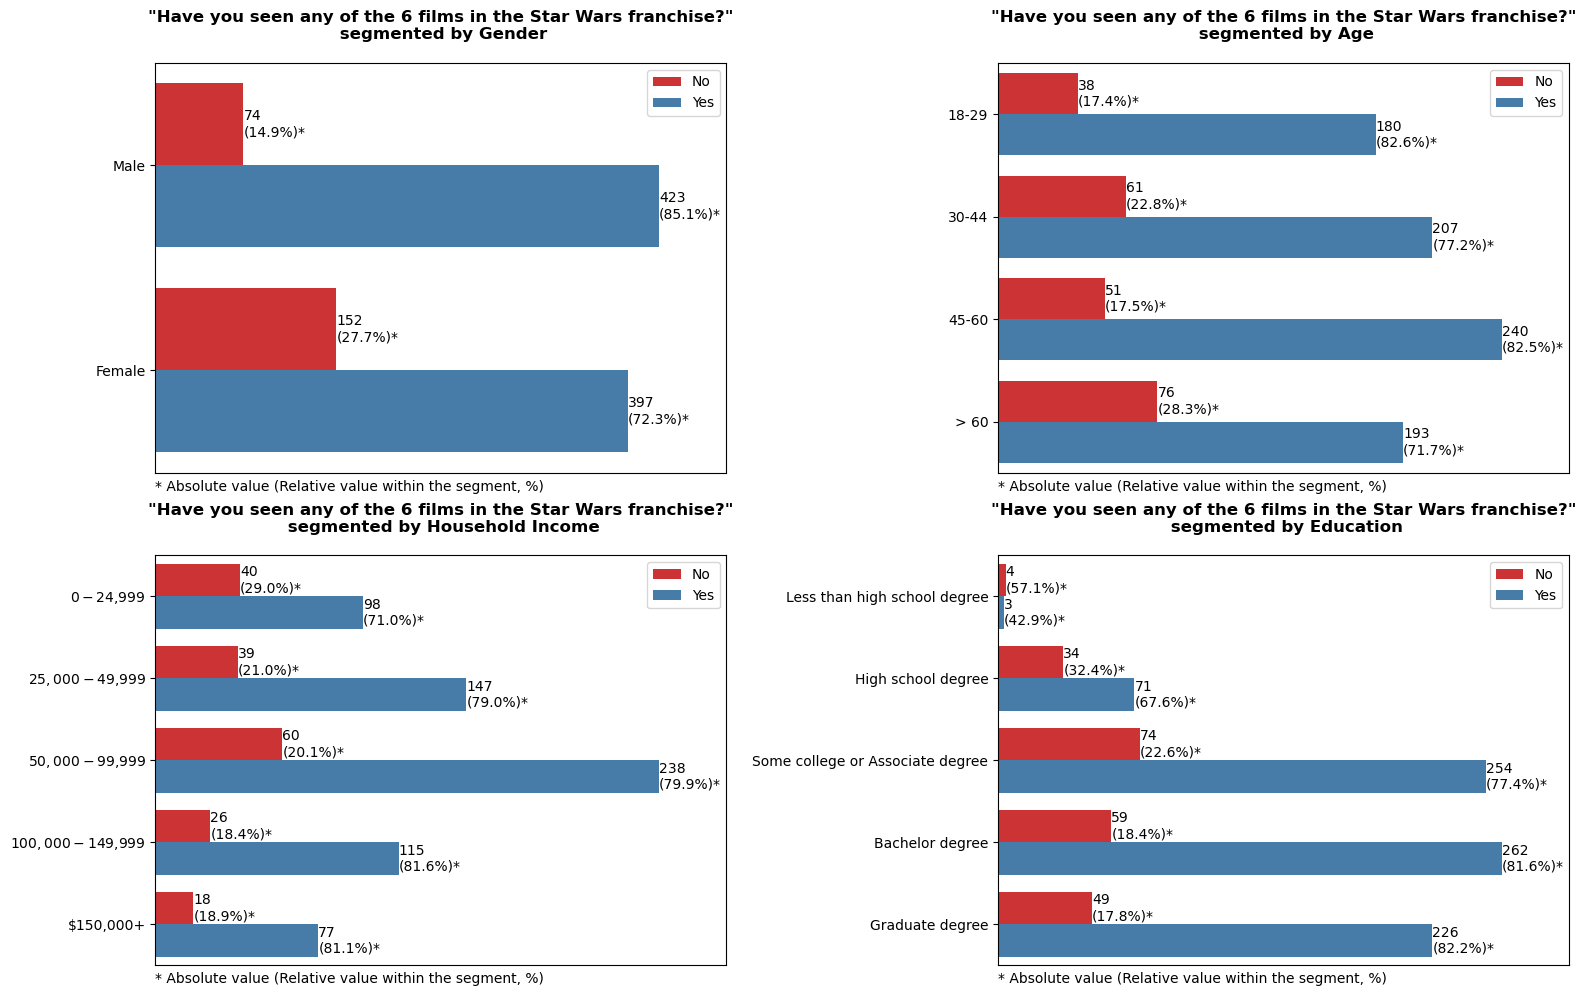

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To enforce the correct(logical) order of apppearing
demographics_order = {'Gender' : ['Male', 'Female'],
         'Age' : ['18-29', '30-44', '45-60', '> 60'],
         'Household Income' : ['$0 - $24,999' , '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+'], 
         'Education' : ['Less than high school degree', 'High school degree', 'Some college or Associate degree', 'Bachelor degree', 'Graduate degree']
        }

# Create a figure with subplots
fig, axes = plt.subplots(2,2,figsize=(16,10))

# Flatten the axes array to easily index it
axes = axes.flatten()

for i, segment in enumerate(demographics[:-1]):
    segments(star_wars, y=segment, hue=question, order=demographics_order[segment], ax=axes[i], 
             title=f'"Have you seen any of the 6 films in the Star Wars franchise?"\n segmented by {segment}')

plt.tight_layout()
plt.show()

We see a noticable difference by gender: ~85 % of men have seen at least one “Star Wars” movie compared to ~72 % of women.

The Star Wars franchise seems to be the least popular among the age group above 60 years old. Almost 30% of respondents of this age group didn't see any of the films, comparing to just ~17% for age groups 18-29, 45-60 and 23% for age group 30-44. 

We see that ~80% of the respondents whose household income is more than 25,000 watched at least one movie. For the segment which household income is lower than 25,000 this number drops to 70%. This trend suggests that higher income is correlated with a greater likelihood of having seen the films, possibly reflecting differences in access to media or cultural engagement across income levels.

For the Education we have an interesting observation. There is a clear positive trend between education level and familiarity with the "Star Wars" franchise, suggesting that the franchise may have a stronger cultural presence among those with more education. For instance, people with a Graduate degree have the highest percentage of "Yes" responses (82.2%), while those with Less than high school degree have the lowest (42.9%).

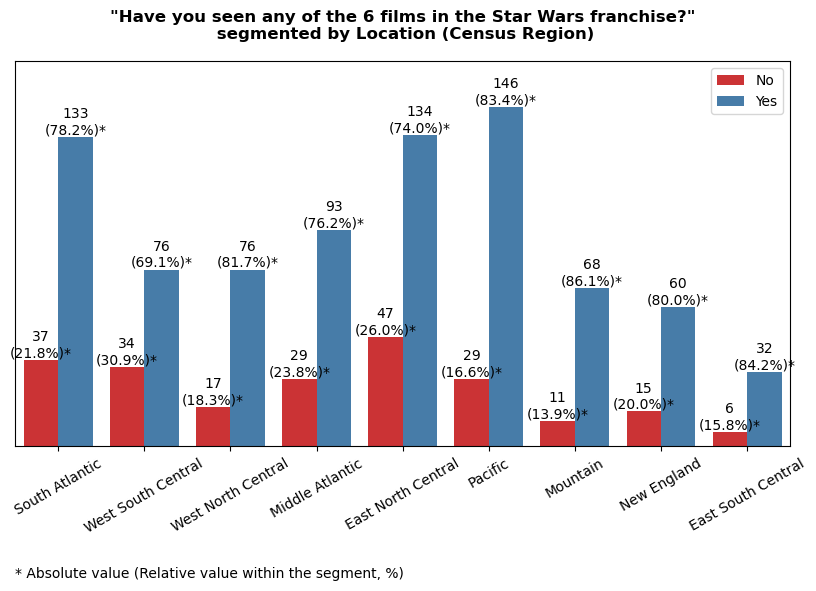

In [25]:
fig, axes = plt.subplots(figsize=(10,5))
segments(star_wars, x='Location (Census Region)', hue=question, ax=axes, 
         title=f'"Have you seen any of the 6 films in the Star Wars franchise?"\n segmented by Location (Census Region)',
         ticks_rotation=30, y_note=-0.35)
plt.show()

The "Yes" responses dominate across all regions, with the highest percentage in the Mountain region (86.1%) and the lowest in the West South Central region (69.1%), followed by East North Central(74%).

### Finding the best (highest-ranked) film

As we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. **Remember that the lower the number the higher the rank of the film.**

In [27]:
ranking = star_wars.iloc[:,9:15].mean().round(2)
ranking.index = [x.replace('Star Wars: ','') for x in info.iloc[0,9:15].values]
ranking.sort_values()

Episode V The Empire Strikes Back    2.51
Episode VI Return of the Jedi        3.05
Episode IV  A New Hope               3.27
Episode I  The Phantom Menace        3.73
Episode II  Attack of the Clones     4.09
Episode III  Revenge of the Sith     4.34
dtype: float64

It looks like the "original" movies (Episodes IV–VI) are rated more highly than the newer ones (Episodes I–III). Why the respondents ranked the movies the way they did? It is possible that more people watched certains movie/-s. Let's see that.

### Finding the most viewed movie

In [28]:
viewed = star_wars.iloc[:,3:9].sum()
viewed.index = [x.replace('Star Wars: ','') for x in info.iloc[0,3:9].values]
viewed.sort_values(ascending=False)

Episode V The Empire Strikes Back    758
Episode VI Return of the Jedi        738
Episode I  The Phantom Menace        673
Episode IV  A New Hope               607
Episode II  Attack of the Clones     571
Episode III  Revenge of the Sith     550
dtype: object

It appears that more respondents saw the original movies than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular. 

### Finding the best (highest-ranked) film - take 2

To make a more fare comparison let's analyse what it the best Star Wars movie for the share of respondents who indicated they have seen all of them. 

In [29]:
mask = star_wars.iloc[:,3:9].all(axis=1)
print(f'There are {mask[mask==True].shape[0]} respondents who watched all movies')

ranking_seen_all = star_wars[mask].iloc[:,9:15].mean().round(2)
ranking_seen_all.index = ranking.index
ranking_seen_all.sort_values()

There are 471 respondents who watched all movies


Episode V The Empire Strikes Back    2.38
Episode IV  A New Hope               2.87
Episode VI Return of the Jedi        2.93
Episode I  The Phantom Menace        4.24
Episode III  Revenge of the Sith     4.25
Episode II  Attack of the Clones     4.33
dtype: float64

There are no drastic changes. Episode V is still considered to be the best.  Episode IV moved up from the third place to the second where Episode VI was. Episode III moved up from the last place to the fifth where Episode II was. 

Anyway let's show another method for comparison and do the visualisation for it.

In [30]:
best_counter = star_wars[mask].iloc[:,9:15].eq(1).sum()
best_counter = pd.DataFrame(data={'Film name':ranking.index, 'Counter':best_counter})
best_counter['Counter_%'] = round(best_counter['Counter'] / best_counter['Counter'].sum() * 100,0).astype(int)

In [31]:
best_counter

,Film name,Counter,Counter_%
ranking_1,Episode I The Phantom Menace,47,10
ranking_2,Episode II Attack of the Clones,18,4
ranking_3,Episode III Revenge of the Sith,27,6
ranking_4,Episode IV A New Hope,128,27
ranking_5,Episode V The Empire Strikes Back,169,36
ranking_6,Episode VI Return of the Jedi,82,17


[]

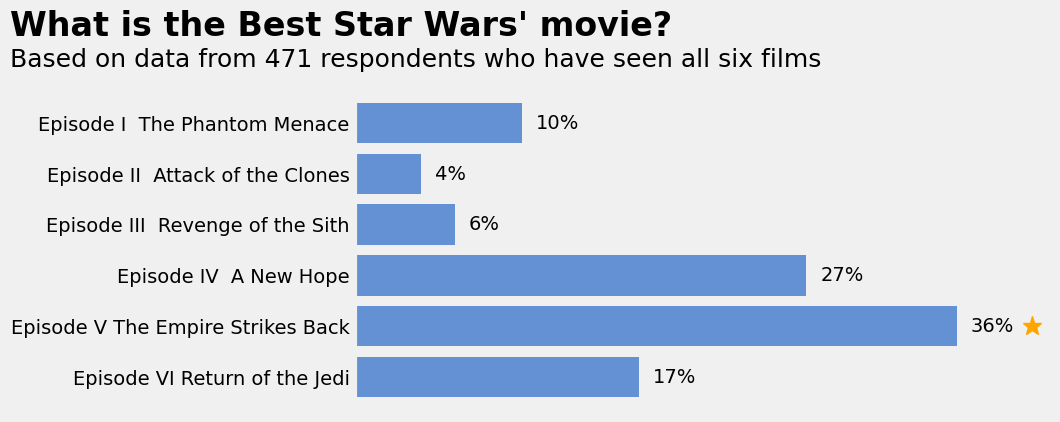

In [32]:
import matplotlib.style as style

style.use('fivethirtyeight')

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=best_counter, x='Counter_%', y='Film name', color='#528de5')

#Erasing Non-Data Ink
ax.set_xlabel('')
ax.set_ylabel('')
#Erasing Redundant Data-Ink
ax.set_xticks([])
# Adding padding to the right of the plot
x_min, x_max = ax.get_xlim()
ax.set_xlim(x_min, x_max * 1.10)

# Adding bar labels
ax.bar_label(ax.containers[0], fontsize=14, fmt='%d%%', padding=10)

# Adding marker
ax.plot(40.5, 4, "*", markersize=14, color="orange")

# Adding title and subtitle
ax.text(x=-0.495,y=1.14, ha='left', va='bottom', transform=ax.transAxes,                     # Use axes coordinates to position text relative to plot area            
        s="What is the Best Star Wars' movie?", size=24, weight='bold')
ax.text(x=-0.495,y=1.05, ha='left', va='bottom', transform=ax.transAxes,                     # Use axes coordinates to position text relative to plot area                
        s='Based on data from 471 respondents who have seen all six films', size=18)  

plt.plot()

The inspiration for this and below plot is taken from the article ["America’s Favorite ‘Star Wars’ Movies (And Least Favorite Characters)"](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) by Walt Hickey.

### Star Wars Character Favorability Ratings

Let's now plot the Star Wars character ratings. We will do so in the same way as in the article - in a boilerplate format used by political favorability polls. But first let's prepare the data. We will take into account only ratings from respondents who watched at least one movie and rated at least one of the movies. 

In [34]:
# DataFrame that contains only character ratings columns and rows only for respondents who watched at least one movie
character_rating_1_seen = star_wars[star_wars['Seen any films in the Star Wars franchise?']==True].iloc[:,15:29]
# Drop rows that don't contain any rating
character_rating_1_seen.dropna(how='all', inplace=True)

character_rating_count = pd.DataFrame()

for character in character_rating_1_seen.columns:
    counts = character_rating_1_seen[character].value_counts(dropna=False)
    # Assign based on previously defined likert_scale
    character_rating_count.loc[character, 'Counter_favorable'] = counts.loc[5.0] + counts.loc[4.0]
    character_rating_count.loc[character, 'Counter_neutral'] = counts.loc[3.0]
    character_rating_count.loc[character, 'Counter_unfavorable'] = counts.loc[2.0] + counts.loc[1.0]
    character_rating_count.loc[character, 'Counter_unfamiliar'] = counts.loc[np.NaN]
    
for col in character_rating_count.columns:
    character_rating_count[col] = character_rating_count[col].astype(int)
    character_rating_count[col+'_%'] = round(character_rating_count[col]/ character_rating_1_seen.shape[0]  * 100,0).astype(int)
    
character_rating_count.sort_values(by='Counter_favorable', inplace=True) 

In [35]:
character_rating_1_seen.shape

(829, 14)

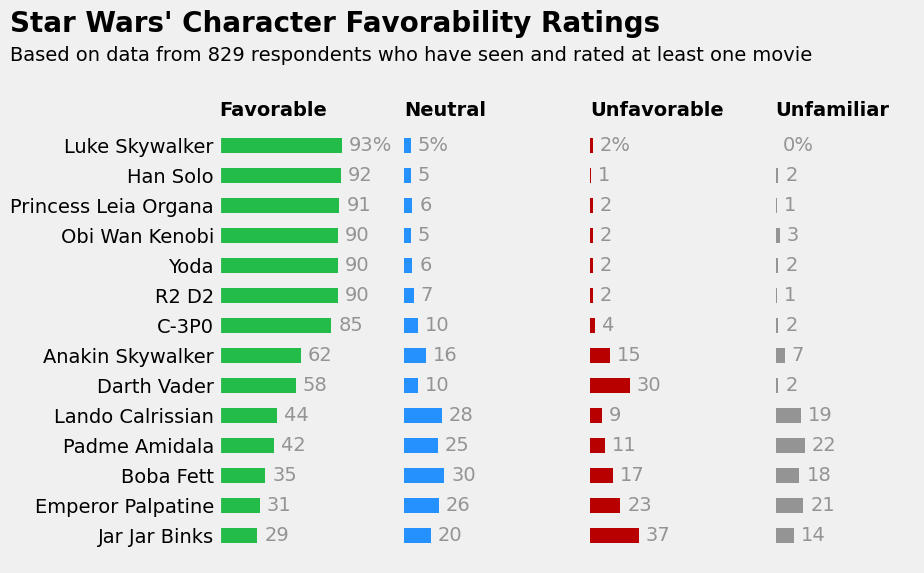

In [36]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 5.5))

# left parameter is used to shift the plot
shift = 140
title_text = [name.split('_')[1].title() for name in character_rating_count.columns[4:]] 

for i, color in zip((0,1,2,3),('#24bc48','#2491ff','#b80000','#949494')):
    ax.barh(y=character_rating_count.index, width=character_rating_count.iloc[:,i+4], 
        height=0.5, left=shift*i, color=color)
    # Adding mini title
    ax.text(shift*i, 14, title_text[i], size=14, weight='bold')
    # Adding bar labels
    ax.bar_label(ax.containers[i], 
                 labels=[str(x) if k < len(character_rating_count.iloc[:,i+4]) - 1 else f"{x}%" for k, x in enumerate(character_rating_count.iloc[:,i+4])], 
                 size=14, padding=5, color='#949494')

ax.set_xbound(lower=0, upper=shift*4-35)
    
# Removing irrelevant
ax.grid(visible=False) 
ax.set_xticklabels([])

# Adding title and subtitle
ax.text(x=-0.3,y=1.18, ha='left', va='bottom', transform=ax.transAxes,                     # Use axes coordinates to position text relative to plot area            
        s="Star Wars' Character Favorability Ratings", size=20, weight='bold')
ax.text(x=-0.3,y=1.12, ha='left', va='bottom', transform=ax.transAxes,                     # Use axes coordinates to position text relative to plot area                
        s='Based on data from 829 respondents who have seen and rated at least one movie', size=14)  

plt.show()

Luke Skywalker, Han Solo, and Princess Leia are the most favorable characters, each with over 90% positive ratings and minimal unfavorable views. In contrast, Jar Jar Binks is the least favorable character, with a high unfavorable rating of 37%, alongside only 29% favorable views. And yes, Jar Jar Binks has favorability rating even lower than "the actual personification of evil in the galaxy" - Darth Vader with its 30% unfavorable score. Jar Jar Binks and Emperor Palpatine are the most controversial characters due to similar proportions of favorable and unfavorable scores.